In [6]:
import sys
sys.path.append("../..")

import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
from gempy.core.data import Grid

## The Grid Class

The grid class will interact with the rest of data classes and grid subclases. Its main purpose is to feed coordinates XYZ to the interpolator.

In [8]:
grid = Grid()

The most important attribute of Grid is `values` (and `values_r` which are the values rescaled) which are the 3D points in space that kriging will be evaluated on. This array will be feed by "grid types":

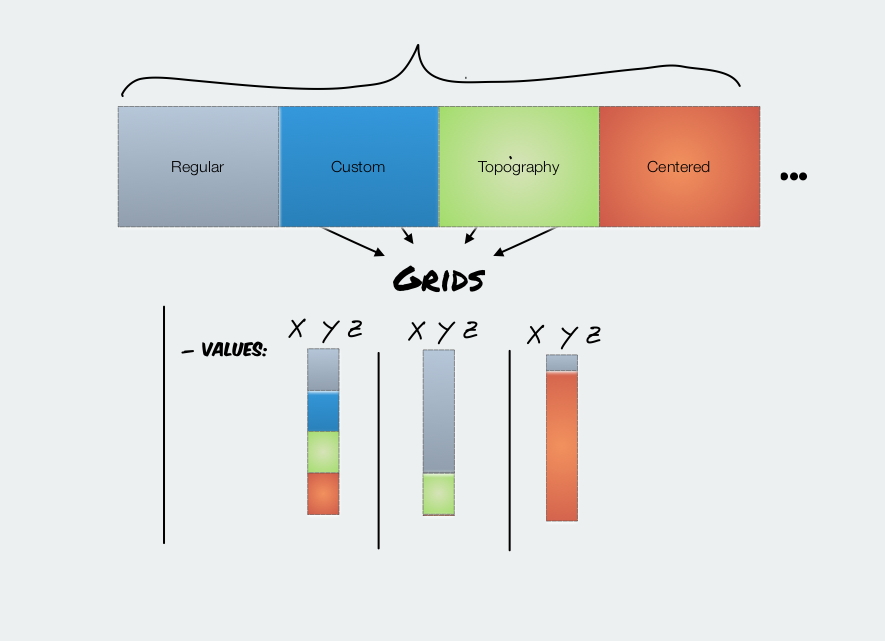

In [9]:
grid.values, grid.values_r

(array([], shape=(0, 3), dtype=float64),
 array([], shape=(0, 3), dtype=float64))

At the moment of writing this tutorial, there is 4 grid types. The number of grid types is scalable and down the road we aim to connect other grid packages (like Discretize) as an extra Grid type

In [10]:
grid.grid_types

array(['regular', 'custom', 'topography', 'gravity'], dtype='<U10')

Each grid vill containt its own `values` attribute as well as other methods to manipulate them depending on the type of grid.

In [14]:
grid.regular_grid.values

array([], shape=(0, 3), dtype=float64)

We can see what grids are activated (i.e. they are going to be interpolated and therefore will live on `Grid().values`) by:

In [16]:
grid.active_grids

array([ True, False, False, False])

By default only the *regular grid* is active. However, since the regular grid is still empty `Grid().values` is empty too.

In [18]:
grid.values

array([], shape=(0, 3), dtype=float64)

The last important attribute of Grid is the length:

In [26]:
grid.length

array([   0, 8000, 8000, 8000, 8000])

Length gives back the interface indices between grids on the `Grid().values` attribute. This can be used after interpolation to know which interpolated values and coordinates correspond to each grid type. You can use the method get_grid_args to return the indices by name:

In [28]:
grid.get_grid_args('topography')

(8000, 8000)

By now all is a bit confusing because we have no values. Lets start adding values to the different grids:

### Regular grid

The `Grid` class have a bunch of methods to set each grid type and activate them.

In [21]:
help(grid.set_regular_grid)

Help on method set_regular_grid in module gempy.core.data:

set_regular_grid(*args, **kwargs) method of gempy.core.data.Grid instance
    Set a new regular grid and activate it.
    
    Args:
        extent (np.ndarray): [x_min, x_max, y_min, y_max, z_min, z_max]
        resolution (np.ndarray): [nx, ny, nz]
    
    RegularGrid Docs
     (inserted) 
    
    
        Class with the methods and properties to manage 3D regular grids where the model will be interpolated.
    
    
    
        Args:
    
            extent (np.ndarray):  [x_min, x_max, y_min, y_max, z_min, z_max]
    
            resolution (np.ndarray): [nx, ny, nz]
    
    
    
        Attributes:
    
            extent (np.ndarray):  [x_min, x_max, y_min, y_max, z_min, z_max]
    
            resolution (np.ndarray): [nx, ny, nz]
    
            values (np.ndarray): XYZ coordinates
    
            mask_topo (np.ndarray): TODO @elisa fill
    
            dx (float): size of the cells on x
    
            dy (fl

In [22]:
grid.set_regular_grid([0,100,0,100,-100,0], [20,20,20])

Now the regular grid object composed on `Grid` has been filled:

In [23]:
grid.regular_grid.values

array([[  2.5,   2.5, -97.5],
       [  2.5,   2.5, -92.5],
       [  2.5,   2.5, -87.5],
       ...,
       [ 97.5,  97.5, -12.5],
       [ 97.5,  97.5,  -7.5],
       [ 97.5,  97.5,  -2.5]])

And the regular grid has been set active (it was already active in any case):

In [13]:
grid.active_grids

array([ True, False, False, False])

Therefore the grid values will be equal to the regular grid:

In [24]:
grid.values

array([[  2.5,   2.5, -97.5],
       [  2.5,   2.5, -92.5],
       [  2.5,   2.5, -87.5],
       ...,
       [ 97.5,  97.5, -12.5],
       [ 97.5,  97.5,  -7.5],
       [ 97.5,  97.5,  -2.5]])

In [25]:
grid.length

array([   0, 8000, 8000, 8000, 8000])

### Topography

In [15]:
l0, l1 = grid.get_grid_args('topography')

In [16]:
grid.values[l0: l1]

array([], shape=(0, 3), dtype=float64)

Now we set topography

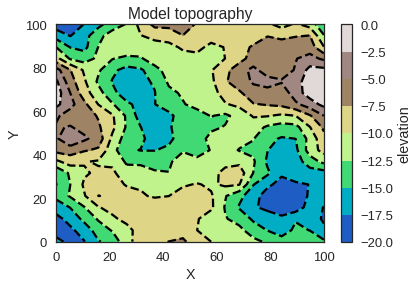

In [17]:
grid.set_topography()

In [18]:
grid.length[np.where(grid.grid_types == 'regular')[0]]

array([0])

In [19]:
grid.length

array([   0, 8000, 8000, 8400, 8400])

In [20]:
grid.values

array([[  2.5       ,   2.5       , -97.5       ],
       [  2.5       ,   2.5       , -92.5       ],
       [  2.5       ,   2.5       , -87.5       ],
       ...,
       [ 87.5       ,  97.5       ,  -9.62840807],
       [ 92.5       ,  97.5       , -11.00462662],
       [ 97.5       ,  97.5       , -14.655463  ]])

In [21]:
grid.deactivate_all_grids()
grid.update_grid_values()

In [22]:
grid.set_active('topography')

In [23]:
grid.set_active('regular')

In [24]:
grid.values.shape

(8400, 3)

### Other grids:

- Custom Grids: link to compute at
- gravity grid: Check tutorial 2.2-Cell-selection